# Preparing input list for the Odyssey cluster analysis run

In order to distribute the analysis amongst nodes on the cluster, I'm generating a .csv-format reference list in which each row will be the name of one image to run analysis on. For each image, I'll assign a control image to each sample. The python script called by the slurm submission script will pick a row based on its position in the job array and run analysis on that file.

In [1]:
import os
files_list = []
for i in os.walk('/Volumes/denic_lab/Lab/TH_Imaging'):
    for f in i[2]:
        if not f.endswith('.czi'):
            continue
        files_list.append(i[0]+'/'+f)

In [3]:
for i in files_list:
    print(i)

/Volumes/denic_lab/Lab/TH_Imaging/6.8.17 TH69 LSM Airyscan 880/HEK LC3 WIPI for Nick/LC3-WIPI_HEK_dSQSTM1_NoTreat_ClumpandEmptyandSingles_Airyscan Processing.czi
/Volumes/denic_lab/Lab/TH_Imaging/6.8.17 TH69 LSM Airyscan 880/HEK LC3 WIPI for Nick/LC3-WIPI_HEK_dTMEM_NoTreat_Clump_2_Airyscan Processing.czi
/Volumes/denic_lab/Lab/TH_Imaging/6.8.17 TH69 LSM Airyscan 880/HEK LC3 WIPI for Nick/LC3-WIPI_HEK_WT_TORIN_SINGLE-DOUBLE_2_Airyscan Processing.czi
/Volumes/denic_lab/Lab/TH_Imaging/6.8.17 TH69 LSM Airyscan 880/HEK LC3 WIPI for Nick/LC3-WIPI_HEK_FIP200_NoTreat_ClumpandSingles2_Airyscan Processing.czi
/Volumes/denic_lab/Lab/TH_Imaging/6.8.17 TH69 LSM Airyscan 880/HEK LC3 WIPI for Nick/LC3-WIPI_HEK_dATG7_NoTreat_ClumpandSingles_Airyscan Processing.czi
/Volumes/denic_lab/Lab/TH_Imaging/6.8.17 TH69 LSM Airyscan 880/HEK LC3 WIPI for Nick/LC3-WIPI_HEK_WT_NoTreat_Clumpandsingles_1_Airyscan Processing.czi
/Volumes/denic_lab/Lab/TH_Imaging/6.8.17 TH69 LSM Airyscan 880/HEK LC3 WIPI for Nick/LC3-W

In [4]:
import pandas as pd
f_series = pd.Series(files_list)
output_df = pd.DataFrame({'files': f_series})
output_df.to_csv('/Users/nweir/Dropbox/code/csth-imaging/im_list.csv')

In [10]:
# testing pandas import of reference csv
df = pd.read_csv('/Users/nweir/Dropbox/code/csth-imaging/im_list_wipi.csv')

In [11]:
df['files'].iloc[3]

'/n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-WIPI_LSM Airyscan 880/LC3-WIPI_HEK_dATG7_NoTreat_40pos_Airyscan Processing.czi'

In [13]:
a = df['files'].iloc[3]
a.split('/')[-1][:-4]

'LC3-WIPI_HEK_dATG7_NoTreat_40pos_Airyscan Processing'

In [14]:
df['files']

0     /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
1     /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
2     /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
3     /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
4     /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
5     /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
6     /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
7     /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
8     /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
9     /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
10    /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
11    /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
12    /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
13    /n/denic_lab/Lab/TH_Imaging/6.12.17 TH70_LC3-W...
Name: files, dtype: object

In [16]:
import sys
sys.path.append('/Users/nweir/Dropbox/code/csth-imaging')
from csth_analysis import czi_io, find_cells, segment_cells, foci

/usr/local/lib/python3.6/site-packages/tifffile.py:313: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
/usr/local/lib/python3.6/site-packages/czifile.py:130: UserWarning: failed to import the optional _czifile C extension module.
Decoding of JXR and JPEG encoded images will not be available.
Czifile.pyx can be obtained at http://www.lfd.uci.edu/~gohlke/
  "failed to import the optional _czifile C extension module.\n"
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [17]:
bg_czi = czi_io.load_multi_czi('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/LC3-WIPI_HEK_dSQSTM1_NoTreat_ClumpandEmptyandSingles_Airyscan Processing.czi')

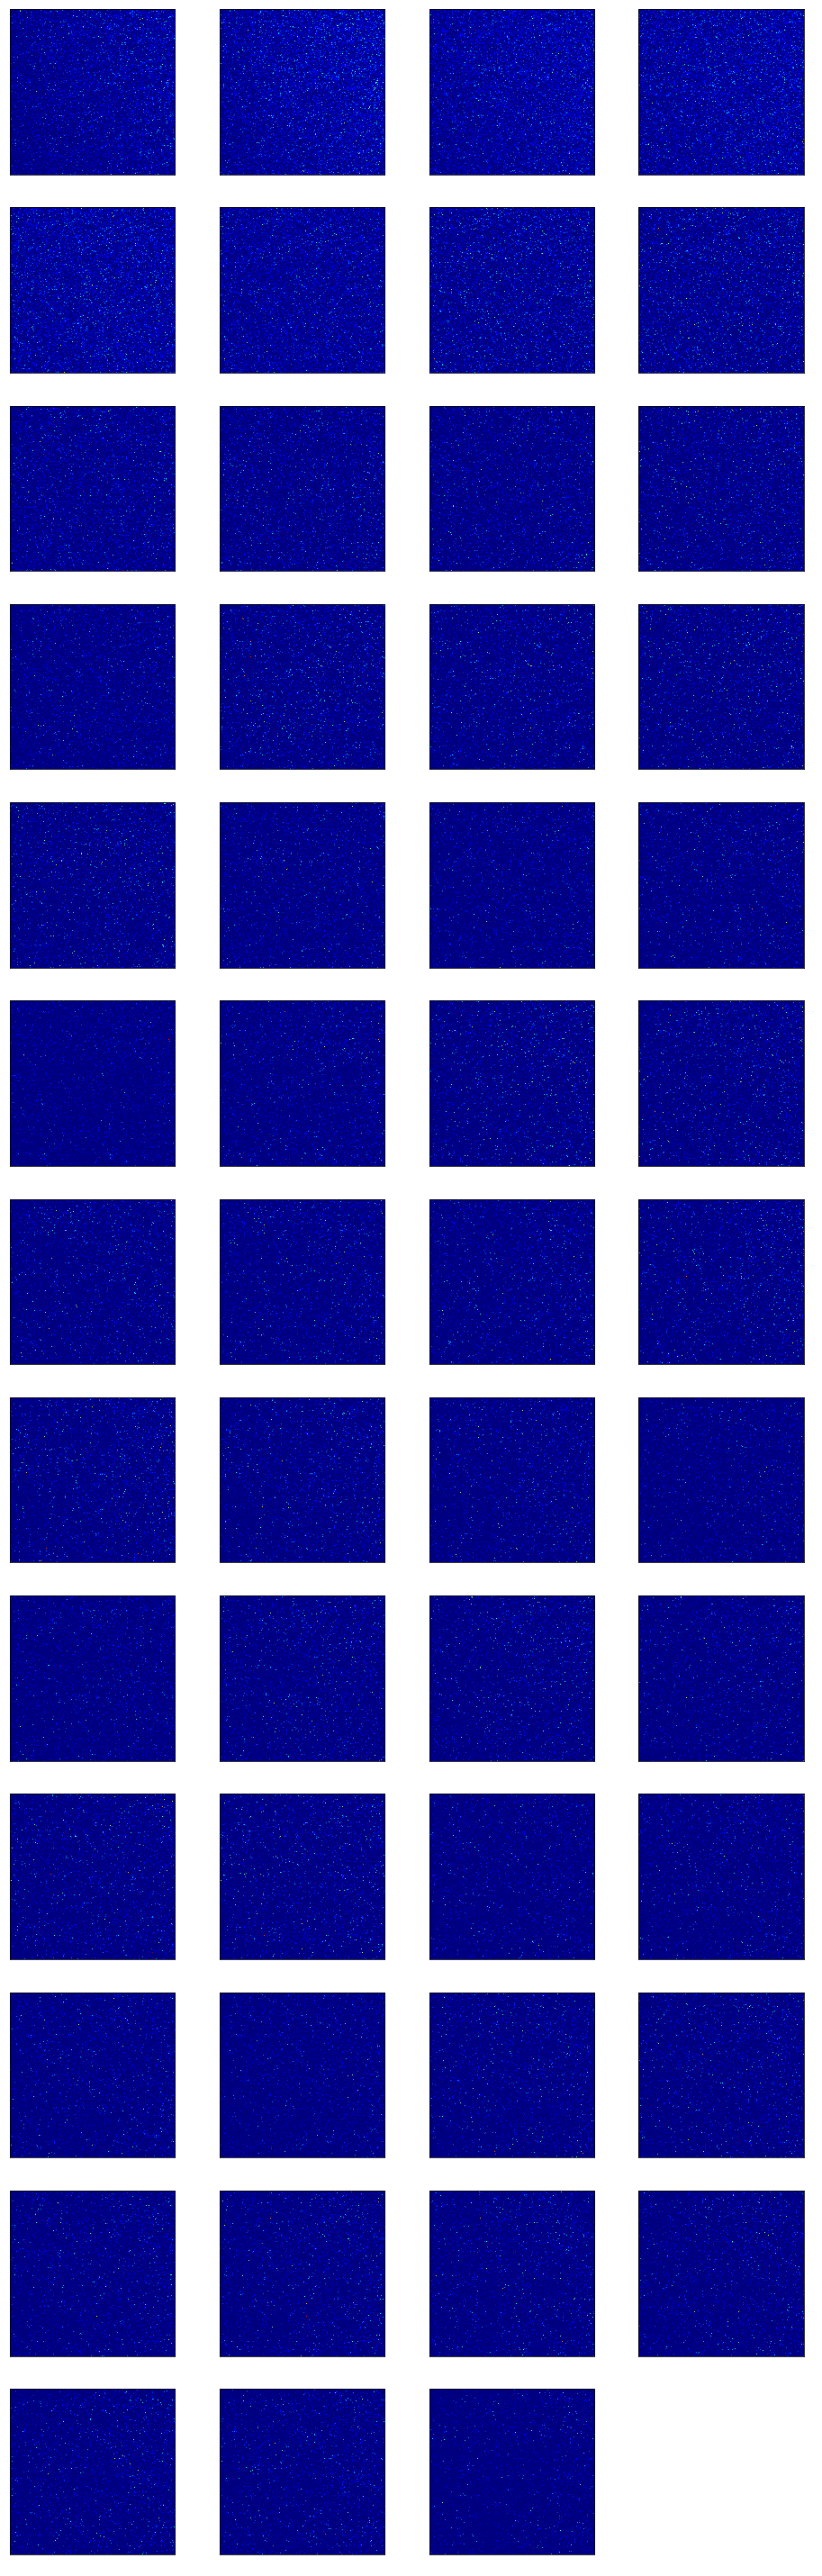

In [23]:
from pyto_segmenter.PexSegment import PexSegmentObj
%matplotlib inline
PexSegmentObj.plot_stack(bg_czi[0][4,1,:,:,:])